In [262]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as linalg

In [278]:
x = np.linspace(0, 1, 1000)
dx = x[1] - x[0]
FE = []
N_n = 11
centers = np.linspace(0, 1, 11)
widths = centers[1] - centers[0]

FE_eval = np.zeros((N_n, 1000))
FE_1d = np.zeros((N_n, 1000))
for i in range(N_n):
  FE.append(TriFun(centers[i], widths))
  FE_eval[i,:] = FE[i].eval(x)
  FE_1d[i,:] = FE[i].derivative(x)

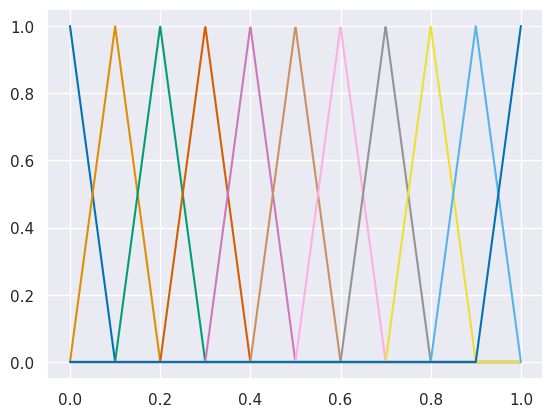

In [279]:
for i in range(11):
  plt.plot(x, FE_eval[i,:])

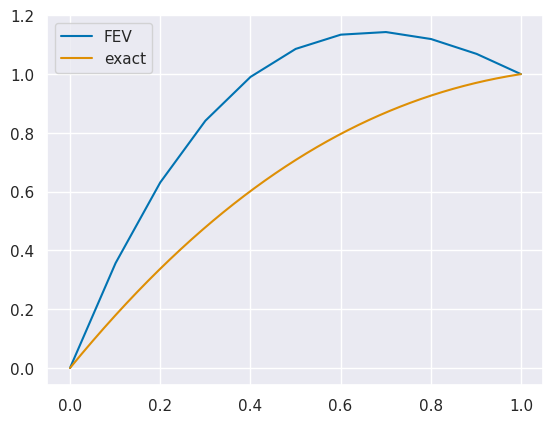

In [313]:
D_type = True

d1_coeff = 2
d0_coeff = 3



def N_exact(x):
  return np.exp(0.5-x/2)*np.sin(x*np.sqrt(3)/2)/np.sin(np.sqrt(3)/2)

def f(x):
  return 0

def bi(i, x):
  return scipy.integrate.trapezoid(f(x)*FE_eval[i,:], x=x)

def Kij(i, j, x):
  K = -scipy.integrate.trapezoid(FE_1d[i,:]*FE_1d[j,:], x=x)
  if d1_coeff != 0:
    K += d1_coeff*scipy.integrate.trapezoid(FE_eval[i,:]*FE_1d[j,:], x=x)
  if d0_coeff != 0:
    K += d0_coeff*scipy.integrate.trapezoid(FE_eval[i,:]*FE_eval[j,:], x=x)
  return K

b = np.zeros(N_n)
K = np.zeros((N_n,N_n))
for i in range(N_n):
  for j in range(N_n):
    K[i,j] = Kij(i,j,x)
  b[i] = bi(i, x)

x0 = 0
x1 = 1

b[1] += -x0*K[1,0]
b[-2] += -x1*K[-2,-1]
K = K[1:-1,1:-1]
b = b[1:-1]

a = linalg.solve(K, b)
a = np.concatenate([[x0],a,[x1]])

def u_h(a):
  u_h = x*0
  for i in range(N_n):
    u_h = u_h + a[i]*FE_eval[i,:]
  return u_h

solution = u_h(a)

plt.plot(x, solution, label='FEV')
plt.plot(x, N_exact(x), label='exact')
plt.legend()

[0.    0.055 0.12  0.195 0.28  0.375 0.48  0.595 0.72  0.855 1.   ]


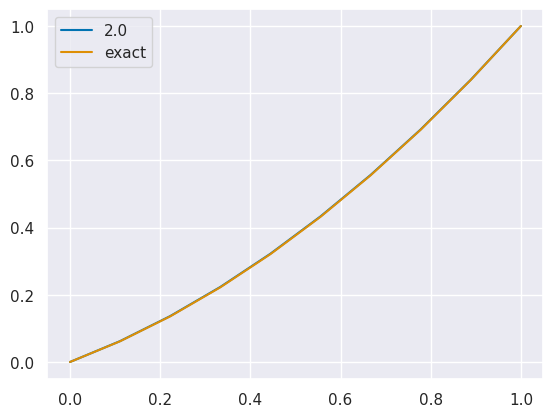

In [207]:
N_exact = 0.5*x**2 + 0.5*x

K1 = np.diag(np.full(N_n, 20))
K1[0,0], K1[-1,-1] = 10, 10
K1 = K1 + np.diag(np.full(N_n-1, -10), k=1)
K1 = K1 + np.diag(np.full(N_n-1, -10), k=-1)

b = np.full(N_n, 0.1)
b[0], b[-1] = 0.05, 0.05

K2 = np.zeros((N_n, N_n))
K2[0,0] = 5
K2[-1,-1] = 5


#for A in np.linspace(0.5, 2, 10):
K = -K1+K2

b[-2] = b[-2] - 10
a = linalg.solve(K[1:-1,1:-1], b[1:-1])
a = np.concatenate([[0],a,[1]])
print(a)
def u_h(a):
  u_h = x*0
  for i in range(N_n):
    u_h = u_h + a[i]*f_basis(x, i)
  return u_h

solution = u_h(a)

plt.plot(x, solution, label=A)
plt.plot(x, N_exact, label='exact')
plt.legend()